In [2]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

# Single Variable Stats

We can take a quick visual look at some of the major stats and charts that are relevant thus far. This page is made in Tableau, since it is a quick and easy way to visualize data: https://public.tableau.com/app/profile/akeem.semper/viz/BasicStatsCharts/Story1 

Tableau is free if you're a student, you can get a copy here: https://www.tableau.com/university-students 

## Single Variable Exploration - Self Check Exercise

This is a (mostly) empty template that can be used for a little bit of a self check of the CH 1-4 stuff, or the basic examination of one varaible.

This is useful becuase there's very little guidance, so you'll need to figure out what to do on your own. Looking forward, one of the primary reasons that we need to know this stuff for machine learning is something called Exploratory Data Analysis (EDA), which is usually the first step in doing machine learning stuff. We take whatever data we're using, load it up, and look through it to see if anything is wrong, weird, useful, or interersting. This helps us prepare our data for the ML work, to make things as accurate and reliable as possible. This little bit is kind of part 1 of EDA that you'll need to do later on.

The first dataset is pretty simple. The second is slightly more complex. 

Here's a few potentially useful things that you don't need to memorize:
<ul>
<li>Get rid of any non-numbers: newDataFrame = oldDF[~np.isnan(oldDF)]
<li>Apply a function to everything in a dataframe (one with one column!): (e.g. mult by 2.54): dataFrame.apply(lambda x: x*2.54)
</ul>

#### Load Data and Explore

In [3]:
#Load the data
#filename is 'HeightWeight.csv"
df = pd.read_csv("data/HeightWeight.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
#Do basic exploration - range, min, max, std, mean...
#Ask yourself, does this match your understanding of reality?
df["Weight"].describe()

count    500.000000
mean     106.000000
std       32.382607
min       50.000000
25%       80.000000
50%      106.000000
75%      136.000000
max      160.000000
Name: Weight, dtype: float64

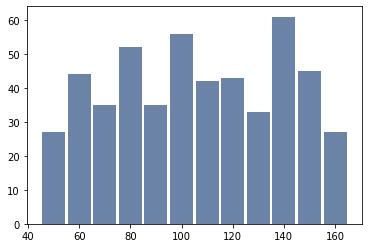

In [5]:
#Graph it, can you make a histogram, PMF, CDF?
#When you look at it, does it make sense?
hist = thinkstats2.Hist(round(df["Weight"],-1))
thinkplot.Hist(hist)

#### Segment Dataset and Explore 

Segment the dataset by gender, so we can look at each sample. 

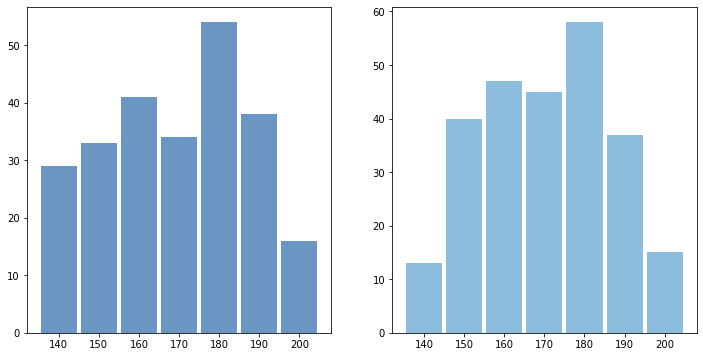

In [6]:
#Split the data. Do the stats and graphs for each gender.
#Again, does it make sense? Match your understanding of reality?
maleHeight = df[df["Gender"] == 'Male']
maleHeight = round(maleHeight["Height"],-1)
maleHist = thinkstats2.Hist(maleHeight)
femaleHeight = df[df["Gender"] == 'Female']
femaleHeight = round(femaleHeight["Height"],-1)
femaleHist = thinkstats2.Hist(femaleHeight)


thinkplot.PrePlot(num=2,rows=1,cols=2)
thinkplot.SubPlot(1)
thinkplot.Hist(maleHist)
thinkplot.SubPlot(2)
thinkplot.Hist(femaleHist)

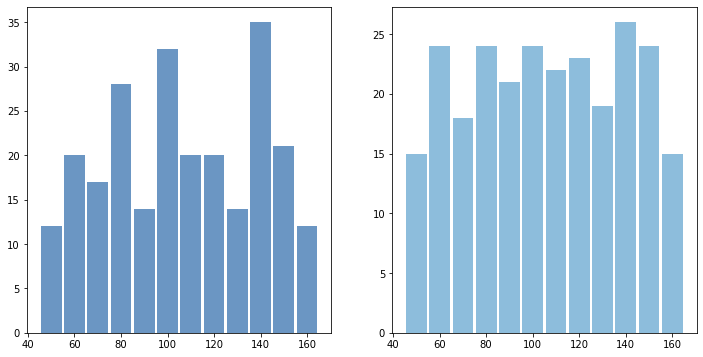

In [7]:
# Visualize the two distributions
maleWeight = df[df["Gender"] == 'Male']
maleWeight = round(maleWeight["Weight"],-1)
maleWHist = thinkstats2.Hist(maleWeight)
femaleWeight = df[df["Gender"] == 'Female']
femaleWeight = round(femaleWeight["Weight"],-1)
femaleWHist = thinkstats2.Hist(femaleWeight)


thinkplot.PrePlot(num=2,rows=1,cols=2)
thinkplot.SubPlot(1)
thinkplot.Hist(maleWHist)
thinkplot.SubPlot(2)
thinkplot.Hist(femaleWHist)

##### Draw Some Interim Conclusions

Based on what we've seen so far, did anything stand out? Any trends, patterns, or anything that may spur further investigation or conclusions?

<ul>
<li> In your exploration, did anythign stand out? Are there weird patterns? Outliers? Things that don't make sense? Errors? Incorrect values?
    <ul>
    <li> (This dataset is pretty simple, so if you don't see anything crazy, that's normal.)
    <li> Weight of women seems to be slightly flatter (lower kurtosis - this term comes later).
    <li> Overall it is more uniform, and less normal than I'd expect.
    </ul>
</ul>

## More Complex Exploration Example

Repeat the basic process with this more complex data. For this, you might need to do more investigation/examination - particulary with things like errors, outliers, etc....

This is kind of realistic - here's some data, is there anything we need to 'worry' about in using it? Does anything jump out as potentially interesting? Or possibly indicitive of something? 
<br><br><br>

#### Explore WAGE - Considering POSITION and NATIONALITY

If you consider WAGE as the varaible you care about - look for dasic descriptions, patterns, outliers or errors. Do things like POSITION or NATIONALITY indicate any differences in the WAGE?

##### Load Data and Do Basic Exploration/Clean-up

Load the data and see if there is anything that needs to be addressed before proceeding, like erroneuous data or massive outliers. This may consist of text-based statistics, visualizations, or both - the point of cleaning and exploring the data is to get it to the point where we can understand how to use it, however you get it there is OK. 

In [8]:
#Filename is "fifa_eda.csv"
df2 = pd.read_csv("data/fifa_eda.csv")
df2.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [9]:
#Generate some overview statistics
df2.value_counts()

ID      Name           Age  Nationality  Overall  Potential  Club                Value   Wage  Preferred Foot  International Reputation  Skill Moves  Position  Joined  Contract Valid Until  Height    Weight  Release Clause
16      Luis García    37   Spain        71       71         KAS Eupen           750.0   6.0   Right           1.0                       3.0          RCM       2014    2019-01-01            5.833333  143.0   1100.000000       1
232053  T. Buhagiar    20   Australia    60       72         Sydney FC           375.0   1.0   Right           1.0                       3.0          CAM       2018    2020-01-01            5.833333  143.0   544.000000        1
232070  R. Caballero   27   Paraguay     66       66         Rionegro Águilas    675.0   1.0   Left            1.0                       2.0          ST        2018    2021-01-01            6.000000  176.0   911.000000        1
232067  N. Bandiera    28   Argentina    65       65         Curicó Unido        550.0   2.0 

##### Segment Data - Extract Needed Columns

We don't need all the other stuff at the moment. For ease, we can chop out the 3 columns we care about, and work with that subset. 

Note: leaving all the data together is fine, this is only to make it a little easier since we know we only care about some of it. 

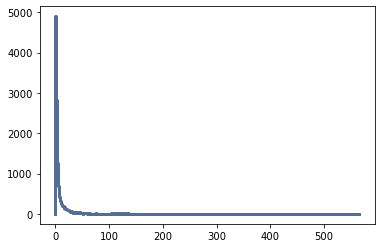

In [22]:
wPN = df2[["Wage","Position","Nationality"]]
wPN["Wage"].describe()
wPNHist = thinkstats2.Hist(wPN["Wage"])
thinkplot.Pmf(wPNHist)

##### Wages - Check for Outliers

One thing to note right here - we have a real outlier! Look at the largest wage.
Is this an error? Is someone just Bezos-level right? We need domain knowledge - i.e. I'm going to look up more info and Google

As well, some people have a wage of 0.

In [15]:
#Look up the rich person
wPN.max()

Wage              565.0
Position             ST
Nationality    Zimbabwe
dtype: object

##### Outlier Investigation - Researching Context

I don't know much about the details of soccer, but I do know Messi is a crazy huge star. I'm going to Google "Messi Wage" and see what I find. One of the first hits was: https://www.cbssports.com/soccer/news/lionel-messi-barcelona-contract-details-674-million-earnings-leaked-by-spanish-paper-in-bombshell-report/
It appears this is real. 

Should we remove it? Depends on out exact intent... If we are looking at how much soccar players normally earn, filtering out people who are such massive outliers may make sense. This is where we need to understand what we are doing this for, in reality - not stats. We are basically doing this as an exercise, so we can arbitrarily pick. I'm going to say that if there is a 'stream' of big salaries leading up to Messi, we'll leave it in. If he's way out in front with a massive jump, then it is likely not helpful. 

The 0 wages are similar. Are they players who are between contracts? Players who didn't make the cut? We need to know what this means in reality to make a real decision. Since the wage values are in the hundreds, and based off of what I read in teh above article, I can surmise that these contracts are likely less than one million, since the wage values are measured in millions. They stay!

In [31]:
#Look at the top 25 salaries
top25 = wPN[wPN["Wage"] >= 9.0]
top25

,Wage,Position,Nationality
0,565.0,RF,Argentina
1,405.0,ST,Portugal
2,290.0,LW,Brazil
3,260.0,GK,Spain
4,355.0,RCM,Belgium
...,...,...,...
13717,11.0,CM,England
13778,9.0,LM,Cyprus
14036,9.0,CB,England
14225,9.0,LM,Republic of Ireland


There are a lot of big contracts, Messi shall live on in our data. 

This is a judgement call, and a borderline one at that. It would be very reasonable to exclude the outlier, and if we were analyzing things relating to the "average" soccer player, we would probably want to. 

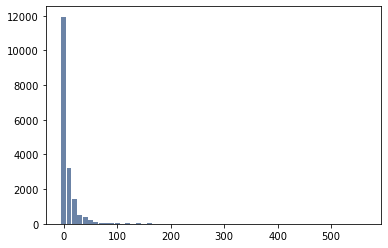

In [37]:
#Graph the wage on its own.
wPNHist = thinkstats2.Hist(round(wPN["Wage"],-1))
thinkplot.Hist(wPNHist)


##### Test for Normality

We can see that our original data is not normal at all, it is highly skewed. Adding a transformation may help us out - we can see if our data fits a lognormal distribution. 

c:\Users\atrsy\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\atrsy\Documents\NAIT\Data Analytics\DATA 3450 - Statistics for ML\DATA 3450 Git Repositories\Basic_Stats_in_Python_Student_Workbooks\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


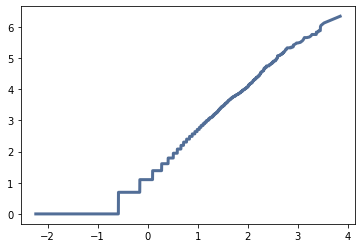

In [38]:
#Pareto Visual Test
thinkstats2.NormalProbabilityPlot(np.log(wPN["Wage"]))

Looks very clustered at the start. Maybe a pareto dist?

I'm going take a quick look at the distribution and zoom in on the start, with the lower salaries before going forward. 

In [39]:
#See how many contratcts are....
cdf2 = thinkstats2.Cdf(wPN["Wage"])
#Less than 1 million
print(cdf2.Prob(1))
#Less than 10 million
print(cdf2.Prob(10))
#Less than 20 million
print(cdf2.Prob(20))

0.2823639259625419
0.7793156478277585
0.8823529411764706


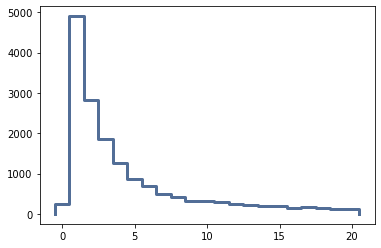

In [44]:
# Take a more detailed look at the lower salaries. 
# Decide what to do here - stats, visualize, divide data, etc...
lowWage = wPN[wPN["Wage"] <= 20]
lowHist = thinkstats2.Hist(lowWage["Wage"])
thinkplot.Pmf(lowHist)

##### Interim Conclusions

Based off of all this I can probably conclude that the vast majority of players have relatively "small" contracts, and there's a trickle of richer people. 

Quick look at the hight salaries...

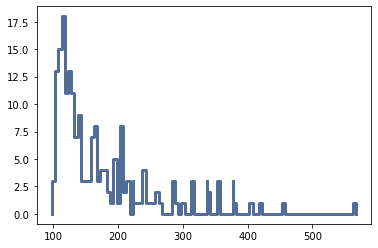

In [48]:
#Take a quick look at the high salaries. 
topWage = wPN[wPN["Wage"] >= 100]
topHist = thinkstats2.Hist(topWage["Wage"])
thinkplot.Pmf(topHist)

#### Investigating the Impact of Other Variables

We were asked to look at position and nationality, so we can examine that and see if that impacts wages
This part isn't super straightforward, since both nationality and position have lots of options, ealistically, this requires some open ended thought, and probably a little research.

My first idea is to calculate the mean (and maybe other stats) for each position or each nationality. I need to figure out how to take all goalies, calculate metrics, then take all defenders, calculate metrics, etc....
Or something along those lines, there are a lot of ways to address a querstion like this...

##### Using Grouping

The groupby function allows us to segment a dataframe along different lines, and do things like calculate statistics. If we don't need to truly treat our data as separate groups multiple times, this may be easier than splitting the data into multiple dataframes. 

In [54]:
# We could write a loop, but that is more work.
# The groupby function does it for us, we say how we want it grouped, and add the calculation for each group. 
# We can do this once for each metric we care about, then put the results into a new dataframe.
# E.g. grouping example:
posWages = wPN.groupby(by="Position").mean()
posStd = wPN.groupby(by="Position").std()
posMed = wPN.groupby(by="Position").median()

print(posMed.sort_values(by='Wage'))


          Wage
Position      
CB         2.0
CM         2.0
GK         2.0
RWB        2.0
CAM        3.0
RM         3.0
RB         3.0
LWB        3.0
LW         3.0
ST         3.0
CDM        3.0
LB         3.0
CF         3.0
LDM        4.0
RW         4.0
RCM        4.0
RCB        4.0
LCB        4.0
LM         4.0
LCM        5.0
RDM        5.5
RS         6.0
LS         6.0
LF         9.0
LAM       10.0
RF        11.5
RAM       12.0


##### Salaries by Position

I googled soccer positions and got: https://yoursoccerhome.com/soccer-position-abbreviations-what-do-they-all-mean/

I can reasonably conclude that it looks like midfielders and forwards make the most money. More specifically the highest paid players are forwards - this is largely from the higher median vs mean. It appears that it pays to be closer to the opponent's net than your own. 

##### Group by Nationality

We can do a similar analysis by looking at the data by the nationality as the group-by dimension. 

In [58]:
#Same deal for nationality. 
natWages = wPN.groupby(by="Nationality").mean()
natStd = wPN.groupby(by="Nationality").std()
natMed = wPN.groupby(by="Nationality").median()

print(natWages.sort_values(by="Wage"))

                           Wage
Nationality                    
India                  0.000000
Bolivia                0.833333
Ethiopia               1.000000
Indonesia              1.000000
Andorra                1.000000
...                         ...
Croatia               21.682540
Armenia               22.000000
Gabon                 26.933333
United Arab Emirates  39.000000
Dominican Republic    71.000000

[164 rows x 1 columns]


We can also group by more than one thing, if desired. 

In [62]:
# Example:
posnat = wPN.groupby(by=["Position", "Wage"])
print(posnat.head().sort_values(by="Wage"))

        Wage Position  Nationality
17008    0.0      LDM     Bulgaria
1933     0.0      CAM  Ivory Coast
1907     0.0      LCB     Slovenia
1902     0.0       LM         Peru
2514     0.0       LM     Paraguay
...      ...      ...          ...
8      380.0      RCB        Spain
1      405.0       ST     Portugal
6      420.0      RCM      Croatia
7      455.0       RS      Uruguay
0      565.0       RF    Argentina

[4012 rows x 3 columns]


And even do a crosstab if we want to get crazy...

In [103]:
# Example:
# pd.crosstab(df3["Nationality"], df3["Position"], values=df3["Wage"], aggfunc="median").round()

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Nationality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2.0,7.0,10.0,NaN,2.0,18.0,NaN,1.0,NaN,4.0,...,6.0,2.0,1.0,NaN,NaN,2.0,7.0,10.0,NaN,13.0
Algeria,16.0,6.0,6.0,NaN,7.0,4.0,NaN,18.0,6.0,30.0,...,1.0,16.0,2.0,10.0,NaN,30.0,NaN,7.0,19.0,15.0
Andorra,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,44.0,NaN,NaN,NaN,NaN,NaN,6.0,3.0,NaN,...,NaN,2.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Venezuela,3.0,4.0,3.0,NaN,1.0,2.0,NaN,1.0,NaN,NaN,...,4.0,5.0,NaN,NaN,NaN,3.0,22.0,2.0,NaN,3.0
Wales,19.0,3.0,10.0,NaN,5.0,2.0,NaN,4.0,6.0,3.0,...,3.0,4.0,3.0,4.0,NaN,4.0,5.0,25.0,3.0,5.0


##### Salaries by Nationality

The nationality thing is a little harder to draw solid inferences from. Countries that have a low number of players are highly variable - one or two really highly paid stars can shift the metrics - e.g. look at the std for Gabon. (More Gabon below). We can see one stand-out in Brazil, having an extremely high mean and median salary with a very large sample size - Viva Brazil!

We'd probably need to cut it down even futher to countries that have a large number of players to get an actual trend worth analyzing. Doing that makes things look more like we may expect - big time soccer countries have lots of highly paid players. When a country is represented by only a handful of salaries the sample is just too small, and we really only see the differences between those players rather than the groups. 

One thing to note here is that it appears that the wealth is, comparatively, spread all over the globe. Small and less developed countries seem to have more big ballers than we may initially expect. 

##### Deep Dive on Gabon

In [74]:
#Look at Gabon for an example of the wide varaibility of wages. 
# E.g. print the dataframe, filtered to see only Gabon, and show the highest wages
# df2[df2["Nationality"]=="Gabon"].head(15)

df2[df2["Nationality"] == "Gabon"].max()

ID                                245454
Name                            W. Ebane
Age                                   35
Nationality                        Gabon
Overall                               88
Potential                             88
Club                        Sparta Praha
Value                            59000.0
Wage                               265.0
Preferred Foot                     Right
International Reputation             3.0
Skill Moves                          4.0
Position                              ST
Joined                              2018
Contract Valid Until          2023-01-01
Height                          6.166667
Weight                             190.0
Release Clause                  112100.0
dtype: object

##### Large Countries

If we filter down the countries to only those with over 200 people we would probably be able to use this subset to analyze some more trends. We could plot distribution visualizations and compare between populations with this data with a much greater degree of reliability. 

In [92]:
# Look at wage data for those countries with >200 players. 

